#### Sección 1

Considera el dataset del banco `banco.csv` y utilizando `pandas`, realiza las siguientes actividades:

1. Obten y discute información sobre la media, desviación estándar y cuartiles: Q1, y Q3 de los datos.

2. Localiza los datos faltantes y reemplazalos con alguna de las técnicas vistas en clase, justifica y explica la decisión tomada.

3. Calcula los diferentes Estados civiles de los cuenta habientes y grafica los porcentajes mediante un pie plot de `seaborn`.

4. ¿Qué instrucción de pandas usas para filtrar los registros de los cuentahabientes mayores de 50 años cuyo trabajo es del área de Administración?

5. Convierte la variable loan a numérica usando dummies

6. ¿Qué instrucción de pandas usas para filtrar sólo las columnas: contact, housing y day de personas cuyo valor de educación es ‘secondary’?

7. Realiza la gráfica de bigotes de balance y compara con la función `describe()` de `pandas`. Compara si ambos métodos indican las mismas observaciones

8. Crea una columna nueva llamada ‘riesgo’ que valga 1 o 0, valdrá 1 si el cuentahabiente ha pedido préstamos hipotecarios y personales y su contacto
es desconocido. En cualquier otro caso es 0.

9. ¿Hay correlación entre las variables ‘age’ y ‘balance’ de los cuentahabientes? Resuelve esta pregunta mediante una gráfica de tipo scatter plot

10. Realiza una gráfica de barras de `seaborn` de los cuentahabientes por ‘job’

                age        balance           day
count  45211.000000   45211.000000  45211.000000
mean      40.936210    1362.272058     15.806419
std       10.618762    3044.765829      8.322476
min       18.000000   -8019.000000      1.000000
25%       33.000000      72.000000      8.000000
50%       39.000000     448.000000     16.000000
75%       48.000000    1428.000000     21.000000
max       95.000000  102127.000000     31.000000

age          0
job          0
marital      0
education    0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
dtype: int64



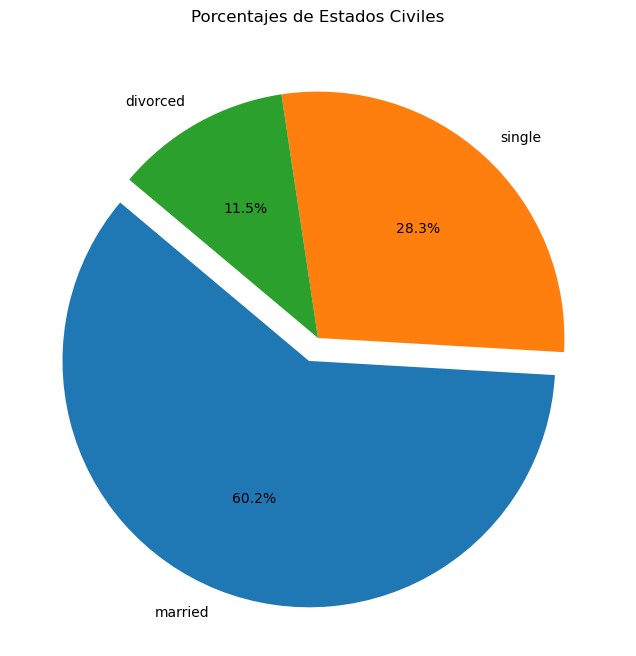

       age         job   marital education  balance housing loan   contact  \
0       58  management   married  tertiary     2143     yes   no   unknown   
21      56  management   married  tertiary      779     yes   no   unknown   
34      51  management   married  tertiary    10635     yes   no   unknown   
65      51  management   married  tertiary     6530     yes   no   unknown   
67      59  management  divorced  tertiary       59     yes   no   unknown   
...    ...         ...       ...       ...      ...     ...  ...       ...   
45072   54  management  divorced  tertiary     5475      no   no  cellular   
45109   78  management   married   unknown     1780     yes   no  cellular   
45150   65  management   married   unknown     2352      no   no  cellular   
45194   59  management   married  tertiary      138     yes  yes  cellular   
45201   53  management   married  tertiary      583      no   no  cellular   

       day month  
0        5   may  
21       5   may  
34    

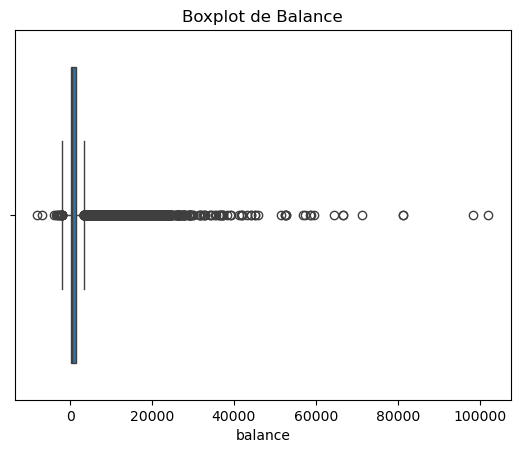

       age           job   marital  education  balance housing  loan  \
0       58    management   married   tertiary     2143     yes     0   
1       44    technician    single  secondary       29     yes     0   
2       33  entrepreneur   married  secondary        2     yes     1   
3       47   blue-collar   married    unknown     1506     yes     0   
4       33       unknown    single    unknown        1      no     0   
...    ...           ...       ...        ...      ...     ...   ...   
45206   51    technician   married   tertiary      825      no     0   
45207   71       retired  divorced    primary     1729      no     0   
45208   72       retired   married  secondary     5715      no     0   
45209   57   blue-collar   married  secondary      668      no     0   
45210   37  entrepreneur   married  secondary     2971      no     0   

         contact  day month  risk  
0        unknown    5   may     0  
1        unknown    5   may     0  
2        unknown    5   may

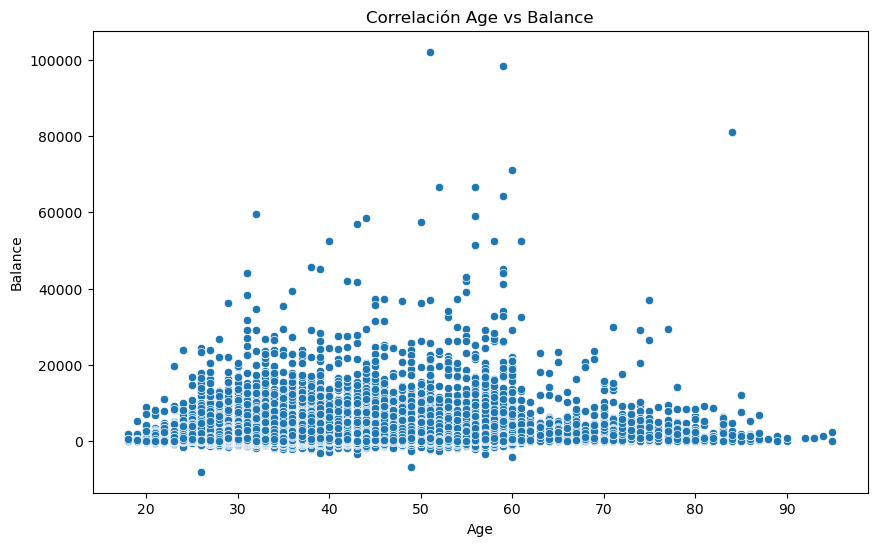

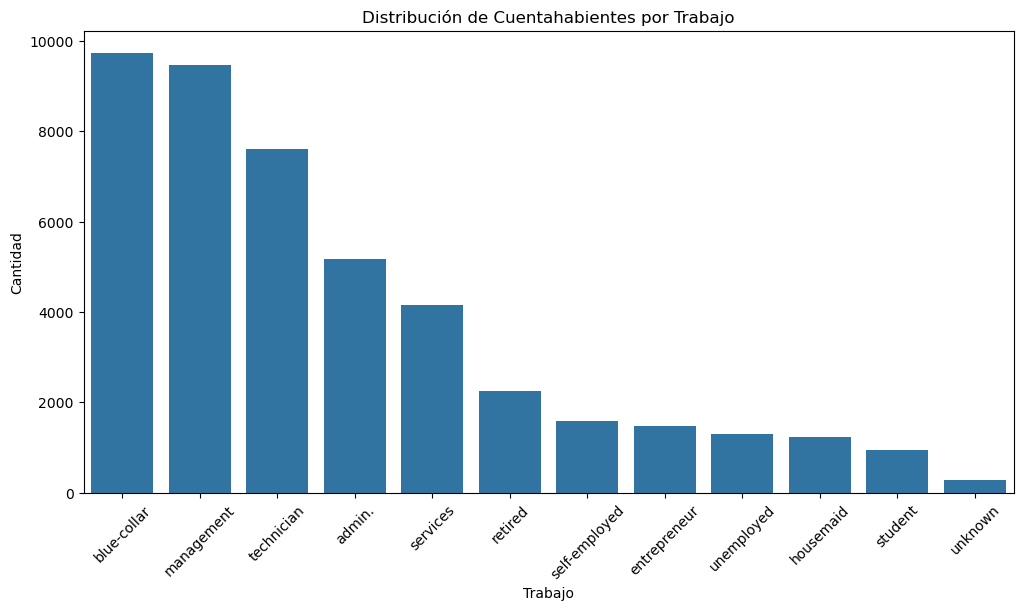

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

banco = pd.read_csv('banco.csv')

# 1)
print(banco.describe(), end='\n\n')

# 2)
# Localiza y cuenta datos nulos en cada columna
print(banco.isnull().sum(), end='\n\n')

# 3)
marital_counts = banco['marital'].value_counts(normalize=True) * 100
plt.figure(figsize=(8, 8))
explode = (0.1, 0, 0)
plt.pie(marital_counts, labels=marital_counts.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Porcentajes de Estados Civiles')
plt.show()

# 4)
filtro1 = banco[(banco['age'] > 50) & (banco['job'] == 'management')]
print(filtro1, end='\n\n')

# 5)
banco['loan'] = pd.get_dummies(banco['loan'], drop_first=True)
banco['loan'] = banco['loan'].astype(int)
print(banco.head(), end='\n\n')

# 6)
filtro2 = banco.loc[banco['education'] == 'secondary', ['contact', 'housing', 'day']]
print(filtro2, end='\n\n')

# 7)
sns.boxplot(x=banco['balance'])
plt.title('Boxplot de Balance')
plt.show()

# 8)
banco['risk'] = ((banco['housing'] == 'yes') & (banco['loan'] == 'yes') & (banco['contact'] == 'unknown')).astype(int)
print(banco, end='\n\n')

# 9)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='balance', data=banco)
plt.title('Correlación Age vs Balance')
plt.xlabel('Age')
plt.ylabel('Balance')
plt.show()

# 10)
plt.figure(figsize=(12, 6))
sns.countplot(data=banco, x='job', order=banco['job'].value_counts().index)
plt.title('Distribución de Cuentahabientes por Trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Cantidad')
plt.xticks(rotation=45)
plt.show()

#### Sección 2

Considera una lista de tamaño 20, con elementos aleatorios entre 0 y 15. Escribe una sentencia de la forma:

1) $[m:n]$
2) $[-m:n]$
3) $[m:]$
4) $[:n]$

Explica si hay alguna manera análoga de obtener esos mismos resultados.

In [2]:
import random

randoms = [random.randint(0, 15) for _ in range(20)]
print('Lista de números aleatorios:')
print(randoms, end='\n\n')

# 1)
print('[m:n]')
print(randoms[2:12]) #[m:n]
print(randoms[-18:-8], end='\n\n')

# 2)
print('[-m:n]')
print(randoms[-17:13]) #[-m:n]
print(randoms[3:13], end='\n\n')

# 3)
print('[m:]')
print(randoms[5:]) #[m:]
print(randoms[-15:], end='\n\n')

# 4)
print('[:n]')
print(randoms[:7]) #[:n]
print(randoms[:-13], end='\n\n')

Lista de números aleatorios:
[6, 6, 4, 4, 2, 11, 4, 14, 3, 10, 3, 15, 4, 12, 2, 12, 3, 12, 1, 1]

[m:n]
[4, 4, 2, 11, 4, 14, 3, 10, 3, 15]
[4, 4, 2, 11, 4, 14, 3, 10, 3, 15]

[-m:n]
[4, 2, 11, 4, 14, 3, 10, 3, 15, 4]
[4, 2, 11, 4, 14, 3, 10, 3, 15, 4]

[m:]
[11, 4, 14, 3, 10, 3, 15, 4, 12, 2, 12, 3, 12, 1, 1]
[11, 4, 14, 3, 10, 3, 15, 4, 12, 2, 12, 3, 12, 1, 1]

[:n]
[6, 6, 4, 4, 2, 11, 4]
[6, 6, 4, 4, 2, 11, 4]



#### Sección 3

1. Utiliza networkx para generar la gráfica de la Figura 1.

![Figura 1](img/Fig1.png)

2. Genera e imprime en pantalla la matriz de adyacencias de esta gráfica.
3. Imprime el grado de cada vértice.

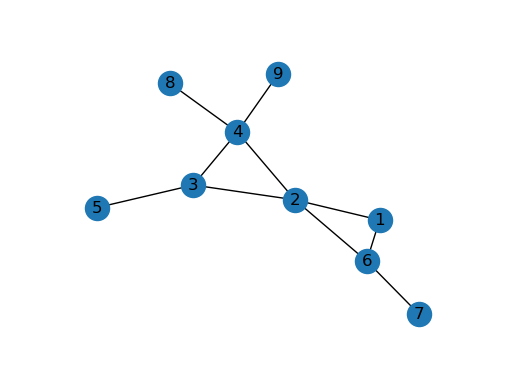

Matriz de adyacencias
 [[0 1 0 0 0 1 0 0 0]
 [1 0 1 1 0 1 0 0 0]
 [0 1 0 1 1 0 0 0 0]
 [0 1 1 0 0 0 0 1 1]
 [0 0 1 0 0 0 0 0 0]
 [1 1 0 0 0 0 1 0 0]
 [0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0]]

Grado de los vertices
 {1: 2, 2: 4, 3: 3, 4: 4, 5: 1, 6: 3, 7: 1, 8: 1, 9: 1}


In [3]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()

G.add_nodes_from(range(1, 10))
edges = [(5, 3), (3, 4), (3, 2), (8, 4), (4, 9), (2, 1), (1, 6), (2, 6), (6, 7), (4, 2)]
G.add_edges_from(edges)

nx.draw_networkx(G)
ax = plt.gca()
ax.margins(0.20)
plt.axis('off')
plt.show()

adj_matrix = nx.adjacency_matrix(G)
print('Matriz de adyacencias\n', adj_matrix.todense(), end='\n\n')

degrees = dict(G.degree())
print('Grado de los vertices\n', degrees)


#### Sección 4

1. Representa este grafo utilizando la librería `NetworkX` de python.

![Grafo](img/grafo.png)

2. Visualiza el grafo utilizando la librería `matplotlib.pyplot`.

3. Utilizando el módulo `xml.etree.ElementTree` transforma el grafo de `NetworkX` a una representación en XML.

4. Utilizando la librería `json`, transforma el grafo de `NetworkX` a una representación en formato JSON.

5. Visualiza el grafo lo más parecido al grafo proporcionado al
inicio.